In [1003]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [1098]:
class FinancialInstrumentBase(): # parent class
    '''Class to analyze financial instruments like stocks. Data downloaded from Yahoo Finance'''
    def __init__(self, ticker, start, end, normal = False):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.normal = normal
        self.get_data()
        self.log_returns()
    
    def __repr__(self): #use this dunder method to document the class structure
        return "FinancialInstrument(ticker = {}, start = {}, end = {}, Normalized = {})".format(self._ticker, 
                                                                                                self.start, 
                                                                                                self.end, 
                                                                                                self.normal)
    
    def get_data(self):
        self.data = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        self.data.rename(columns = {"Close":"price"}, inplace = True)
        if self.normal:
            self.data["price"] = self.data.price.div(self.data.price.iloc[0]).mul(100).copy() #normalize
        
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1)).dropna()
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
    
    def plot_prices(self):
        '''Plots both time series and frequency of returns''' #docstring
        #show historical price action
        fig1 = plt.figure(figsize=(15,8))
        plt.plot(self.data.price)
        plt.xlabel("Date", fontsize=15)
        plt.ylabel("Price, $ USD", fontsize=15)
        plt.suptitle("Historical Price Chart for {} from {} to {}".format(self._ticker, self.start, self.end), fontsize=15)
        plt.grid(which="both")
        plt.show()
        
    def plot_returns(self): #show daily log returns
        self.data.log_returns.plot(figsize=(15,8))
        plt.xlabel("Date", fontsize=15)
        plt.ylabel("% Returns (Log)", fontsize=15)
        plt.suptitle("Daily Log Returns for {} from {} to {}".format(self._ticker, self.start, self.end), fontsize=15)
        plt.grid(which="both")        
        plt.show()
        
        #show daily log returns distribution
        stock.data.log_returns.plot(kind="hist", figsize=(15,8), bins=int(np.sqrt(len(self.data))))
        plt.xlabel("% Returns (Log)", fontsize=15)
        plt.ylabel("Number of Days", fontsize=15)
        plt.suptitle("Frequency of Returns for {} from {} to {}".format(self._ticker, self.start, self.end), fontsize=15)        
        plt.grid(which="both")        
        plt.show()

In [1107]:
class RiskReturn(FinancialInstrumentBase): #child class
    def __repr__(self): #use this dunder method to document the class structure
        return "RiskReturn(ticker = {}, start = {}, end = {}, Normalized = {})".format(self._ticker, 
                                                                                       self.start, 
                                                                                       self.end, 
                                                                                       self.normal)
    
    def __init__(self, ticker, start, end, normal = False, freq = None):
        self.freq = freq
        super().__init__(ticker, start, end, normal = False)
        
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        return "Annualized Performance for {}: Return: {} | Risk {}".format(self._ticker, mean_return, risk)


In [1108]:
stock = RiskReturn("AAPL", "2017-01-01", "2019-1-31", False)

[*********************100%***********************]  1 of 1 completed


In [1109]:
stock

RiskReturn(ticker = AAPL, start = 2017-01-01, end = 2019-1-31, Normalized = False)

In [1110]:
stock._ticker

'AAPL'

In [1111]:
stock.start

'2017-01-01'

In [1112]:
stock.end

'2019-1-31'

In [1113]:
stock.data

,price,log_returns
Date,,
2017-01-03,29.037500,NaN
2017-01-04,29.004999,-0.001120
2017-01-05,29.152500,0.005072
2017-01-06,29.477501,0.011087
2017-01-09,29.747499,0.009118
...,...,...
2019-01-24,38.174999,-0.007958
2019-01-25,39.439999,0.032600
2019-01-28,39.075001,-0.009298


In [1114]:
stock.mean_return("BY") #business year

-0.0118996162208618

In [1115]:
stock.std_returns("BY")

0.08260556073388388

In [1116]:
stock.mean_return("W-Fri")

0.003125350241524997

In [1117]:
stock.annualized_perf()

'Annualized Performance for AAPL: Return: 0.171 | Risk 0.255'

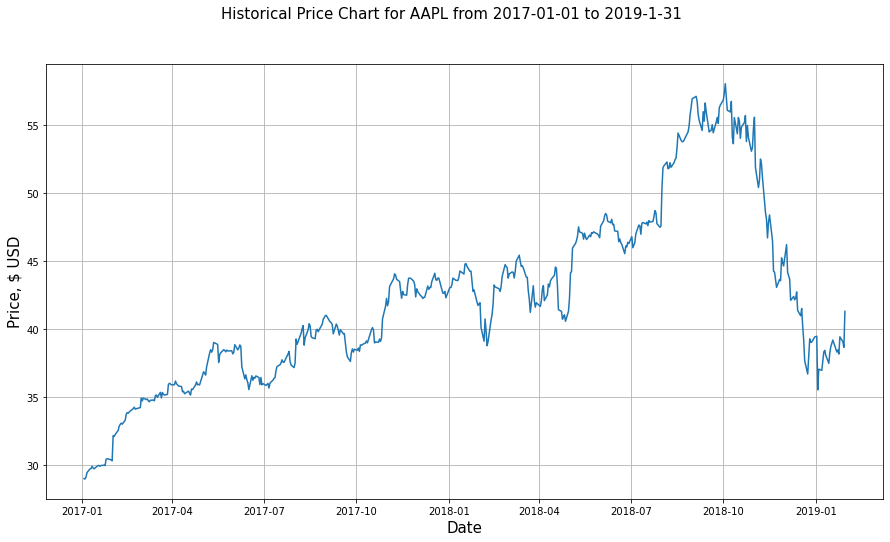

In [1118]:
stock.plot_prices()

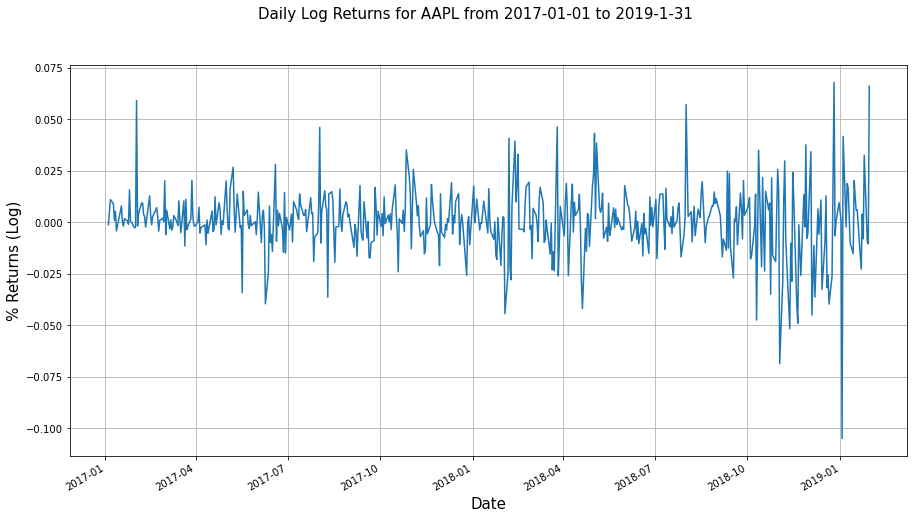

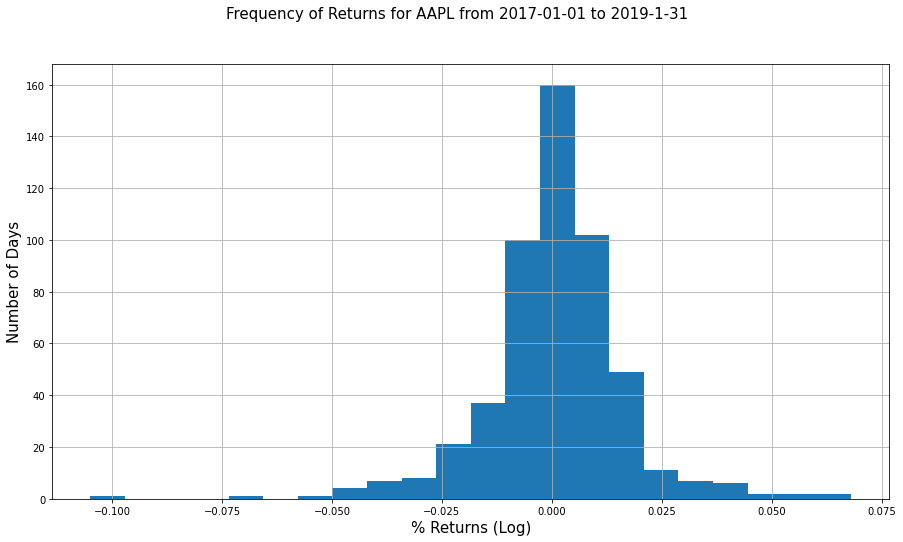

In [1119]:
stock.plot_returns()

In [1120]:
stock.data

,price,log_returns
Date,,
2017-01-03,29.037500,NaN
2017-01-04,29.004999,-0.001120
2017-01-05,29.152500,0.005072
2017-01-06,29.477501,0.011087
2017-01-09,29.747499,0.009118
...,...,...
2019-01-24,38.174999,-0.007958
2019-01-25,39.439999,0.032600
2019-01-28,39.075001,-0.009298


In [1124]:
stock.annualized_perf()

'Annualized Performance for AAPL: Return: 0.171 | Risk 0.255'

In [1122]:
#round(stock.data.price.loc['2015-12-30'],3)

In [1123]:
stock.mean_return("D")

0.0005102750252948266